<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleH_22_1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.1 ODE Initial Value Problem

A differential equation is defined as a function, f(x), which interacts with its independent variable, x, and its derivatives. When a functions derivatives and independent variables are in one dimension, then it is called an ordinary differential equation or ODE.

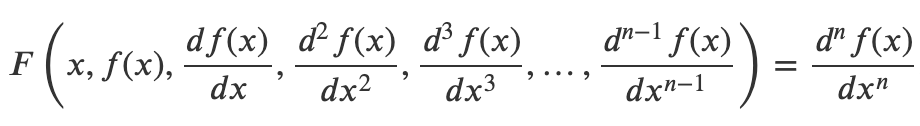



We can write an ODE as seen above, where F is any function that uses one or all of the input arguments. In the image above, n is the order of the differential equation. We say that this is an nth order ODE.

An example of where an ODE could be used is in the relationship between a pendulum of length, l, and mass, m, and the angle that is created with the vertical axis as it moves in time. The pendulum is changing in regards to the x and y axis, but can also be described in polar coordinates.

Another general form differential equation is the partial differential equation, or PDE. Here, a vector named x is made up of independent variables: x1, x2, x3,..., xm. The PDE can be of any order. We often see PDEs as heat equations, where the relationship between temperature and time:

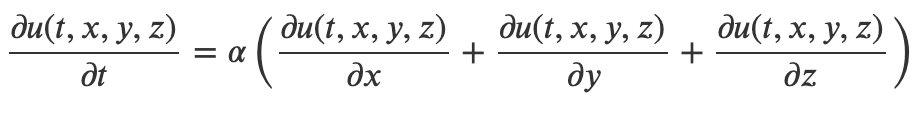

In this PDE, u(t, x, y, z) represents the temperature at a specific location (x, y, z) and at a time, t. Alpha is the thermal diffusion constant.

A function, g(x), is considered a general solution to a differential equation when it satisfies the differential equation. For any one differential equation, there can be many solutions but these are not easily found. For p(x) to be considered a particular solution, it must satisfy the differential equation and n explicitly specified known values of the solution.

When given a specific values for an ODE solution, this is called the initial value. An initial value problem is a problem that has a particular solution when given an initial value.

# 22.2 Reduction of Order

There are many ways to solve first-order differential equations. If we want to apply these methods to higher order differential equations, we must first reduce the order of the differential equation to the first order.

To reduce the order of a higher order differential equation we will consider the state of the system as a function of time with a vector S(t). Then we will take the derivative of the vector, S(t). This will take the nth order ODE and change it into n first order ODEs that share the same terms.

A vector or the state can hold any number of dependent variables, but so long as we take the derivatives with respect to the same independent variable, t, the differential equation is still considered ordinary.

# 22.3 The Euler Method

After taking the derivative of a higher order differential equation, or the derivative of the state function, S(t), we get F(t, S(t)) which is defined as a first order ODE. In this expression, F is the function that expresses the change in state when given a time and state value. We can express S(t) as a linear approximation for time, tj, at time, tj+1. This is seen below:

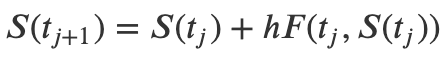

The formula shown above is called the Explicit Euler Formula. It is used to calculate the approximate value for the state at S(tj+1) when given the state at S(tj). This method is the simplest method for solving initial value problems.

**Example**  The differential equation df(t)/dt = e^-t with intial condition f0 = -1 has the exact solution f(t) = -e^-t. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicit Euler Formula. Plot the difference between the approximated solution and the exact solution.

<ipython-input-5-c45642c60ff9>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


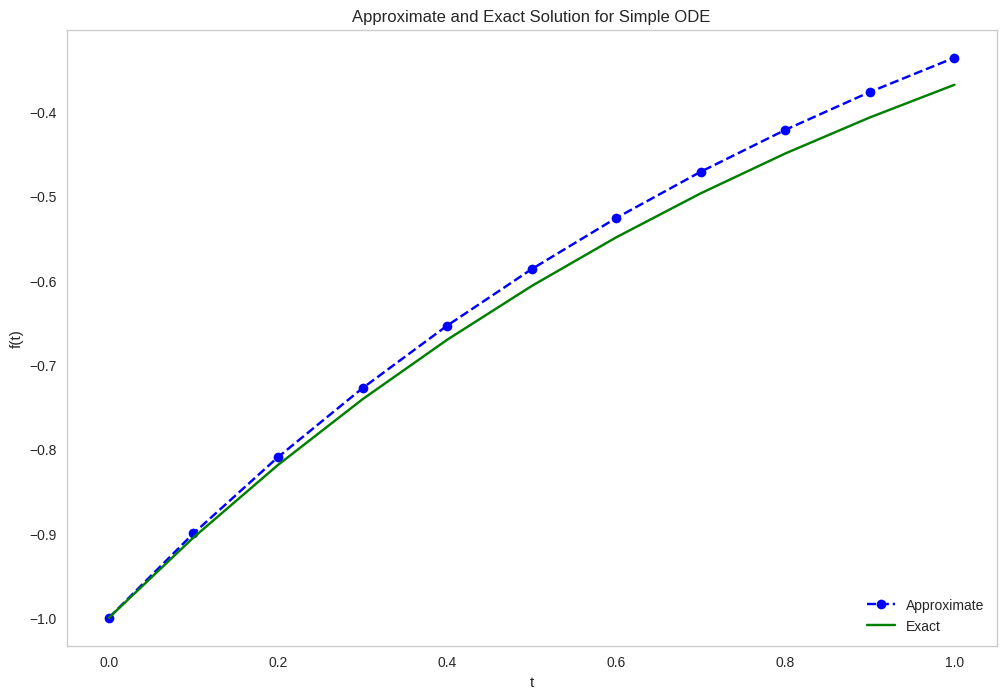

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
%matplotlib inline

# Define parameters
f = lambda t, s: np.exp(-t) # ODE
h = 0.1  # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid
s0 = -1  # Initial Condition

# Explicit Euler Formula
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'bo--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()


From the plot in the figure above, we can see that each adjacent dot is an approximation based upon the previous dot. Starting from the initial value, we can get an approximation through iteration for a solution on the numerical grid. Our solution will improve with a smaller h value.

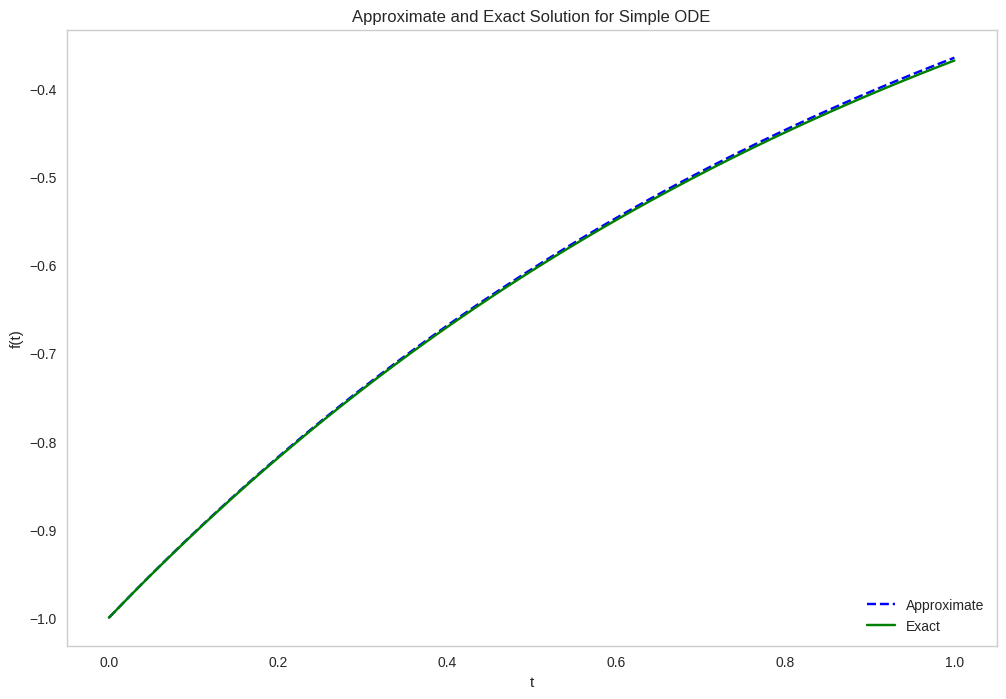

In [6]:
h = 0.01  # Step size
t = np.arange(0, 1 + h, h)  # Numerical grid
s0 = -1   # Initial Condition

# Explicit Euler Formula
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title('Approximate and Exact Solution for Simple ODE')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

The Explicit Euler Formula only needs the values at tj to calculate the state at tj+1, this is why it is called "explicit". Essentially, we can write the state of S(tj+1) in terms of what we already know (ie tj and S(tj)). We could use the Implicit Euler Formula, but it would require that we know the state at S(tj+1) to find each state up to S(tj). This is more challenging to do.